To Do
-----

* Stabilize
* Contourf movie with RAs and Decs
* Input EPIC ID
* Input moving target name
* Move HDF5 from k2mosaic to k2movie
* Run from Gully's data disk instead of online
* Add some unit tests
* Multiple channels


Unit Tests:
-----------
**Targets:**

* Single star
* Supernova
* Dipper
* Asteroid
* Superstamp
* Variable
* Tabby
* Pleiades

**Style**
* Single cadence
* Multiple cadences
* All cadences
* Tracking
* Multichannel

In [4]:
import k2movie
k2movie.k2movie?

In [1]:
import k2movie
import astropy.units as u
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import K2ephem
from astropy.coordinates import SkyCoord
import astropy.units as u


In [7]:
mov=k2movie.k2movie('16152',campaign=6,verbose=True,output_dir='../movies/')
fig,ax=plt.subplots(figsize=(10,10))
fig=mov.inspect(ax,radec=True)
#mov.compute()

Finding 16152
Need to query Simbad and MAST
Finding a moving target
Obtaining ephemeris for 16152 from JPL/Horizons...
	Channels: [26]
	Found ras and decs: 207.44584 deg-9.3423 deg
	Filenames:
		/Users/ch/K2/projects/chiron/database/c06/26/0.h5
No files found?


ValueError: No objects to concatenate

	Filenames:
		/Users/ch/K2/projects/chiron/database/c06/10/0.h5
Initialised:
	Campaign: 6
	Channel: 10
	Cadence: None
	Pixel Tolerance: 50


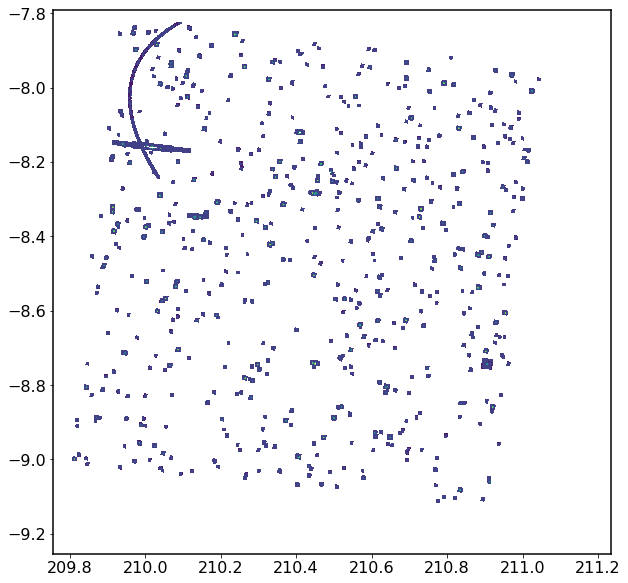

In [58]:
mov=k2movie.k2movie(channel=10,campaign=6,verbose=True)
fig,ax=plt.subplots(figsize=(10,10))
fig=mov.inspect(ax,radec=True)
#mov.compute()